Review : word2vec
랜덤 단어 벡터들로 시작하여 전체 corpus의 각 단어마다 반복. 워드 벡터들을 이용하여 주변의 단어들을 예측하는 모델(context word vector와 center word vector간의 내적을 활용) 학습 시 vector들을 update하여 주변 단어를 더욱 잘 예측하도로 설계. 이후 softmax 함수를 사용하여 probability 도출. 이는 Bag of Words 모델이라 불림. 하지만, 단어의 순서를 고려하지 않는다는 단점. 또한, 이전에 없던 새로운 단어가 들어왔을 때 확률을 제대로 예측하기 어렵다는 단점. word2vec은 학습과정에서 고차원의 공간 내에 비슷한 단어끼리 가까이 배치함.
3. Optimization : Gradient Descent
그렇다면 word vector들을 어떻게 잘 학습시킬 수 있을까?
word vector들을 random하게 0과 가까운 작은 수로 초기화한다. 손실함수는 J로 파라미터인 세타를 변경하여 최대의 J의 값을 같는 것을 목표로 학습을 진행한다. 이 알고리즘의 idea는 현재 세타의 값에서 손실함수 J의 기울기를 계산하고 경사하강법을 진행하는 것이다.
하지만, 손실함수 J는 corpus에는 매우 많은 단어가 포함되어 있기에 이를 반복하여 기울기나 세타를 미분하는 것은 굉장히 많은 비용이 소요됨. 따라서, 신경망 알고리즘에서는 경사하강법을 사용하지 않음. 대신 이를 변형하여 하나의 center word나 32개의 center words들과 같은 작은 배치를 토대로 경사하강법을 진행하는 Stochastic Gradient Descent(SGD)를 사용함. 물론 전체 corpus에 대해 계산한 것이 아니기에 정확하지는 않지만 컴퓨팅 비용 줄여줌. 또한, 모델이 복잡할수록 SGD가 좋은 효율을 가짐. 하지만 역시 학습에 사용되는 데이터의 양이 극히 적기 때문에 희박한 경사하강법이 될 수 밖에 없음. 또한, 실제 등장하는 단어 벡터에 대해서만 update를 진행하고자 할 때도 있을 것이다.
보통 사용되는 딥러닝에서 word vector는 행 벡터로 제시됨. word2vec을 사용할 때에 한 단어당 두 개의 word vector를 사용한다고 했었는데, 쉬운 optimization을 위해 그렇게 사용하며 마지막에는 이를 평균을 내서 사용한다. 물론, 한 벡터만 사용할 수도 있지만, 이는 오히려 알고리즘을 더욱 복잡하게 만든다.
Word2Vec이 제시되었을 때, 두 개의 모델이 존재했다. 하나는 Skip-gram(SG) : center word를 토대로 context words를 예측하는 모델/ 나머지는 Continuous Bag of Words(CBOW) : context words를 토대로 center word를 예측함. 또한 효율적인 학습을 위해 실제 논문에서는 Naive softmax보다 negative sampling을 진행함. Naive softmax를 진행할 때, 분모에서 전체 vocabulary에 대해 내적을 실행해야 하기 때문에 비용이 많이 듬. 따라서, negative sampling에서는 True pair(center word와 context window)와 몇몇 noise pairs(center word와 random word)를 비교하는 binary logistic regression을 학습하고자 한다. objective function에서는 logistic(sigmoid) function을 사용하여 결과값을 0과 1사이로 matching하도록 하는데, true pair에는 단지 sigmoid함수 뒤에 log만 취하는 반면, noise pair에는 sigmoid함수와 log 안에 -1을 곱해버림. 이로 인해, 목적함수가 center word와 context word간의 유사도는 높게 가져가면서, center word와 random word간의 유사도는 낮게 가져가도록 만들 수 있음. 랜덤 단어를 선택할 때, unigram distribution of words를 사용함. 만약 10억개의 word corpus 내에 특정 단어가 90번 등장했다면, 90/10억으로 그 단어의 unigram probability를 계산할 수 있다. 이후 해당 단어를 3/4승 하여 단어 간의 격차를 줄여주고 이후 전체 u(w)3/4승의 합인 Z로 나누어주어 각 단어의 추출 확률을 설정한다.
Co-occurence Matrix : 특정 단어와 다른 단어 간의 등장 빈도에 대한 matrix. window와 symmetric or non-symmetric을 설정. window를 paragraph or full document로 설정할 수도 있음. 하지만 co-occurence Matrix는 많은 양의 storage가 필요한만큼 고차원이며, sparse하며 randomness를 많이 가질 수 있다. 이를 해결하고자 각 단어의 중요한 정보만 고정된, 작은 수의 차원의로 저장할 수 있는데 이를 dense vector라고 한다.(보통 약 25~1000개 차원) 그렇다면 어떻게 dense vector를 만들 수 있나???
SVD(Singular Value Decomposition)을 통해 가능 - 이를 활용하여 truncated SVD를 통해 차원 축소 가능. 하지만 SVD를 통해 word vector를 만든다면 성능이 좋지 못함. 따라서, 빈도에 log를 취한다거나 단어의 최소 임계값을 정하여 전처리를 수행한다던가, function words(a,the)를 고려하지 않는 방안으로 개선할 수 있다. 실제로 이를 활용한 COALS model이 있음. 
count-based model(LSA, COAKS,,,)은 빠른 학습시간과 효율적인 통계정보를 사용하지만, 단어의 유사성 여부만을 파악하는데 사용되며 단어 간 관계는 파악이 불가할 뿐만 아니라, 큰 빈도수에 과도한 중요도를 부여한다는 단점을 갖고 있었다. direct prediction model(word2vec, NNLM) 등은 높은 수준의 성능을 보이고 단어 유사성 이상의 복잡한 패턴을 파악하지만, 말뭉치 크기가 성능에 영향을 미치며 효율적으로 통계정보를 사용하지 못한다는 단점을 갖고 있다. word vector를 만드는 또다른 알고리즘인 GLOVE는 count-based model과 direct prediction을 융합하려했다. glove는 vector의 차이에서 의미 요소를 반영하려 했다. co-occurence 확률이 meaning components를 반영할 수 있다고 생각한 것이다. co-occurence 확률을 어떻게 선형적인 구성요소로 표현하여 벡터를 더하고 뺌에 따라 의미가 함축될 수 있을까? log-bilinear model(내적 대신 두 단어 간 동시 등장할 조건부확률에 log를 취한 것이 두 단어 벡터의 내적과 같다!!) with vector differences(a가 존재할 때 x의 등장확률을 b가 존재할때 x의 등장확률로 나눈 후 로그를 취한 것이 a,b 벡터 간 차와 x벡터의 내적과 같다!!). GLOVE model에서는 두 단어의 내적이 co-occurence probability와 비슷하게 되도록 목적함수를 설정하려 했다. 또한, f function을 사용하여 단어의 빈도수가 많음에 따라 중요도가 높아지는 현상을 제한하려고 했다. 또한, 최적화과정에서는 co-occurence matrix를 직접적으로 수정함에 따라 학습속도 또한 빠르게 유지하였다. 
- GLOVE 모델의 목적은 단어들의 동시 등장 비율 정보인 P(ik)/P(jk)를 인코딩하여 단어 벡터 공간 안에 나타내는 것이다. 이를 위해 목적함수 F(wi,wj,wk) = P(ik)/P(jk)로 설정할 수 있다. 하지만 단어 벡터 공간은 Linear Structure를 가지므로 위 비율을 벡터 공간 안에서 표현하는 것이 불가능 하다. 단어 i,j가 각각 단어 k와 동시에 등장할 확률의 차이를 보이는 것이 목적이므로 vector difference를 활용한 식으로 목적함수 F를 수정.F(wi-wj,wk) = P(ik)/P(jk). 위 식에서 좌변은 벡터, 우변은 스칼라 값을 가짐. 내적을 사용하는 것이 Linear structure를 유지하면서 계산을 깔끔하게 만드므로 F((wi-wj)T * wk) = Pik/Pjk로 설정함.
- GLOVE 모델의 조건 1 : Center word가 context word로도 사용될 수 있기에 단어 벡터 간 교환법칙이 성립해야 함.
- GLOVE 모델의 조건 2 : Co-occurence Matrix는 Symmetric 해야 함.
- GLOVE 모델의 조건 3 : 목적함수 F는 준동형사상(Homomorphism)을 만족해야 함. 이는 F(x+y)=F(x)*F(y)를 만족하는지 여부.  F=e^x를 사용함.

* word2vec 알고리즘은 center word만 보고 negative sampling을 생성한 후에 예측함. whole co-occurence matrix를 보고 최적화를 한다면, entire vector를 보고 최적화할 수 있기에 word2vec은 statistical information은 적다.
NLP에서는 Intrinsic or Extrinsic evaluation이 존재한다. Intrinsic은 평가를 위한 데이터에 적용하여 성능을 평가하는 것으로 계산이 빠르며 시스템을 이해하기 쉽지만, 현실에서 해당 시스템이 유용한지 알 수 없다. Extrinsic Evaluation은 실제 task에 대한 성능 평가로 평가하는 데에 시간이 더욱 걸리고 문제점을 파악하기 어렵지만 때론 더 유용하다. Intrinsic Evaluation은 word analogy를 평가하는 문제를 들 수 있다. GLOVE 모델이 analogy evaluation에서 좋은 평가를 받았지만 교수님은 단지 더 좋은 data로 인해 그러한 결과가 나온 것일 수 있다고 말함. 효율적인 차원은 300차원 이하로 밝혀짐. extrinsic word vector evaluation에서도 좋은 평가. 

7. word senses : 하나의 단어는 오래될수록, 많은 의미를 담고 있음. 어떻게 하나의 word vector로 단어의 의미를 모두 나타낼 수 있지? 비슷한 단어끼리 클러스터링을 수행하는데 이때, bank1, bank2와 같이 다른 뜻을 가졌다면 다른 단어로 취급하여 클러스터링 수행.
우선, 2012년에 수행한 연구로는 window size를 고정한 후 단어 pair 간의 occurence정보를 모으고 각각의 context에 대해 context 내 단어들의 가중합으로 representation을 한다. 이후 k-means clustering을 진행함
다음으로, 2018년에 진행한 연구에 따르면, 하나의 다의어는 다의어가 가진 여러 뜻의 가중합으로 표현될 수 있다고 보았다. 특이한 점은 sparse coding을 통해 단어가 여러개의 뜻을 가질 수 있도록 구성한 후 k개의 벡터만을 선택하여 해당 단어의 뜻을 해석하는 방식을 사용하였다. 

In [13]:
import numpy as np
X = np.array([[0,2,2,0,0,0,0,0,0,0],
              [2,0,0,1,0,0,0,0,0,0],
              [2,0,0,0,0,0,1,0,1,0],
              [0,1,0,0,1,1,0,0,0,0],
              [0,0,0,1,0,0,0,0,0,1],
              [0,0,0,1,0,0,0,0,0,1],
              [0,0,1,0,0,0,0,1,0,0],
              [0,0,0,0,0,0,1,0,0,1],
              [0,0,1,0,0,0,0,0,0,1],
              [0,0,0,0,1,1,0,1,1,0]])

U, S, V_t = np.linalg.svd(X)
k = 5
theta = sum(S[:k]) / sum(S)
print(f'theta : {theta}')

theta : 0.8174988844487284


In [14]:
U = U[:,:k]
print(U)

[[-0.58951321  0.63338858 -0.07381218 -0.31561873  0.08921915]
 [-0.43880494 -0.4679372  -0.0950592  -0.15540716  0.40200628]
 [-0.49906814 -0.51894471  0.18296896 -0.18902671 -0.32887242]
 [-0.21718772  0.19140752  0.37405398  0.29204662  0.48061906]
 [-0.12612756 -0.06426321 -0.39796596  0.39641327  0.19296524]
 [-0.12612756 -0.06426321 -0.39796596  0.39641327  0.19296524]
 [-0.19421905  0.18666537  0.02954001  0.04266901 -0.41679693]
 [-0.11890892 -0.06274144 -0.25333285  0.28215586 -0.35443303]
 [-0.21471749  0.16369162 -0.31774506  0.17599977 -0.30080158]
 [-0.184132    0.00884932  0.57389513  0.57316285 -0.16426787]]


In [15]:
US = np.dot(U, np.diag(S[:k]))
X_hat = np.dot(US, V_t[:k])
X_hat = np.round(X_hat)
print(X_hat)
# SVD를 진행한 행렬 U를 다시 X_hat으로 복원시키면 기존의 X와 거의 유사한 형태임을 확인할 수 있다.

[[ 0.  2.  2. -0.  0.  0. -0.  0. -0.  0.]
 [ 2.  0. -0.  1. -0. -0.  0. -0.  0.  0.]
 [ 2. -0.  0.  0.  0.  0.  1.  0.  1. -0.]
 [-0.  1.  0.  0.  1.  1. -0.  0.  0. -0.]
 [ 0. -0.  0.  1.  0.  0.  0. -0. -0.  1.]
 [ 0. -0.  0.  1.  0.  0.  0. -0. -0.  1.]
 [-0.  0.  1. -0.  0.  0.  0.  0.  0.  0.]
 [ 0. -0.  0.  0. -0. -0.  0.  0.  0.  1.]
 [-0.  0.  1.  0. -0. -0.  0.  0.  0.  1.]
 [ 0.  0. -0. -0.  1.  1.  0.  1.  1.  0.]]


In [18]:
# word vector를 3차원에 plotting
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

bow = ['I','ate','like', 'a', 'banana', 'cherry', 'deep','learning', 'NLP','.']

fig = plt.figure(1, figsize=(8,5))
ax = Axes3D(fig)

for idx, word in enumerate(bow):
    ax.axis([-.75, .75, -.75, .75,-.75,.75])
    ax.text3D(U[idx, 0], U[idx, 1], U[idx, 2], word, size = 15)

# 눈금 레이블 비활성화
ax.set_xticks([])
ax.set_yticks([])
ax.set_zticks([])
plt.show()

<Figure size 800x500 with 0 Axes>

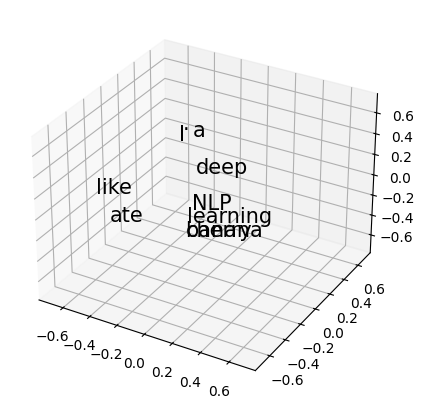

In [20]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import numpy as np

bow = ['I', 'ate', 'like', 'a', 'banana', 'cherry', 'deep', 'learning', 'NLP', '.']

# 주어진 word vector
U = np.array([[-0.58951321, 0.63338858, -0.07381218, -0.31561873, 0.08921915],
              [-0.43880494, -0.4679372, -0.0950592, -0.15540716, 0.40200628],
              [-0.49906814, -0.51894471, 0.18296896, -0.18902671, -0.32887242],
              [-0.21718772, 0.19140752, 0.37405398, 0.29204662, 0.48061906],
              [-0.12612756, -0.06426321, -0.39796596, 0.39641327, 0.19296524],
              [-0.12612756, -0.06426321, -0.39796596, 0.39641327, 0.19296524],
              [-0.19421905, 0.18666537, 0.02954001, 0.04266901, -0.41679693],
              [-0.11890892, -0.06274144, -0.25333285, 0.28215586, -0.35443303],
              [-0.21471749, 0.16369162, -0.31774506, 0.17599977, -0.30080158],
              [-0.184132, 0.00884932, 0.57389513, 0.57316285, -0.16426787]])

fig = plt.figure(1, figsize=(8, 5))
ax = fig.add_subplot(111, projection='3d')

# 각 축의 범위를 설정
ax.set_xlim([-0.75, 0.75])
ax.set_ylim([-0.75, 0.75])
ax.set_zlim([-0.75, 0.75])

for idx, word in enumerate(bow):
    ax.text3D(U[idx, 0], U[idx, 1], U[idx, 2], word, size=15)

# # 눈금 레이블 비활성화
# ax.set_xticks([])
# ax.set_yticks([])
# ax.set_zticks([])

plt.show()


- SVD의 문제점 : 새로운 단어들이 출현하면 matrix의 차원이 자주 바뀜. 대부분의 단어가 동시에 출현하지 않으므로 matrix가 매우 sparse 해짐. 이로 인해 matrix의 차원이 높아지고 계산 비용이 높아짐.
- 이를 보완하고자 불용어 제거, window에서 center word로부터 거리에 따라 weight를 다르게 부여하는 ramp window 적용, 또한, Pearson Correlation이나 negative count를 사용하여 SVD의 성능을 높임.
- word2vec에서는 subsampling(너무 자주 출현하는 단어에 대해서 학습을 덜 시키기 위해 전처리), hierarchical softmax(모든 단어를 이진트리를 형성해서 softmax를 적용.), negative sampling을 적용하여 모델 보완